### Imports

In [1]:
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

import itertools

import pandas as pd
import numpy as np
pd.options.display.max_columns = 50

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Helpers

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Task 1:

Select what features you'll use.

In [3]:
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['salary', 'to_messages', 'deferral_payments',
                 'total_payments', 'loan_advances', 'bonus',
                 'email_address', 'restricted_stock_deferred',
                 'deferred_income', 'total_stock_value', 'expenses',
                 'from_poi_to_this_person', 'exercised_stock_options',
                 'from_messages', 'other', 'from_this_person_to_poi',
                 'poi', 'long_term_incentive', 'shared_receipt_with_poi',
                 'restricted_stock', 'director_fees'] # You will need to use more features

def dict_to_matrix(data):
    features = ["Name"] + sorted(features_list)
    ret = []
    for person in data.keys():
        row = [person]
        for attr in sorted(data[person].keys()):
            row.append(data[person][attr])
        ret.append(row)
    return features, ret

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)
    
cols, df = dict_to_matrix(data_dict)
train    = pd.DataFrame(df, columns=cols)

### Overview

In [4]:
### Categorical columns
cat_columns = [col for col in train.columns if train[col].dtype == object]
print("Categorical columns:")
print(" --- ".join(cat_columns))

### Numerical columns
num_columns = [col for col in train.columns if train[col].dtype != object]
print("Numerical columns:")
print(" --- ".join(num_columns))

print("Shape of train:", train.shape)

train.head()

Categorical columns:
Name --- bonus --- deferral_payments --- deferred_income --- director_fees --- email_address --- exercised_stock_options --- expenses --- from_messages --- from_poi_to_this_person --- from_this_person_to_poi --- loan_advances --- long_term_incentive --- other --- restricted_stock --- restricted_stock_deferred --- salary --- shared_receipt_with_poi --- to_messages --- total_payments --- total_stock_value
Numerical columns:
poi
Shape of train: (146, 22)


,Name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,METTS MARK,600000,NaN,NaN,NaN,mark.metts@enron.com,NaN,94299,29,38,1,NaN,NaN,1740,False,585062,NaN,365788,702,807,1061827,585062
1,BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,NaN,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
2,ELLIOTT STEVEN,350000,NaN,-400729,NaN,steven.elliott@enron.com,4890344,78552,NaN,NaN,NaN,NaN,NaN,12961,False,1788391,NaN,170941,NaN,NaN,211725,6678735
3,CORDES WILLIAM R,NaN,NaN,NaN,NaN,bill.cordes@enron.com,651850,NaN,12,10,0,NaN,NaN,NaN,False,386335,NaN,NaN,58,764,NaN,1038185
4,HANNON KEVIN P,1500000,NaN,-3117011,NaN,kevin.hannon@enron.com,5538001,34039,32,32,21,NaN,1617011,11350,True,853064,NaN,243293,1035,1045,288682,6391065


### Convert some features to numerical

In [5]:
for col in ("bonus", "deferral_payments", "deferred_income", "director_fees",
            "exercised_stock_options", "expenses", "from_messages",
            "from_poi_to_this_person", "from_this_person_to_poi",
            "loan_advances", "long_term_incentive", "other",
            "restricted_stock", "restricted_stock_deferred",
            "salary", "shared_receipt_with_poi", "to_messages",
            "total_payments", "total_stock_value"
           ):
    train[col] = train[col].astype(float)
    
print("Numerical columns:")
" --- ".join([col for col in train.columns if train[col].dtype != object])

Numerical columns:


'bonus --- deferral_payments --- deferred_income --- director_fees --- exercised_stock_options --- expenses --- from_messages --- from_poi_to_this_person --- from_this_person_to_poi --- loan_advances --- long_term_incentive --- other --- poi --- restricted_stock --- restricted_stock_deferred --- salary --- shared_receipt_with_poi --- to_messages --- total_payments --- total_stock_value'

### Missing values

In [6]:
missing = pd.DataFrame(train.isnull().sum())

train.fillna(0, inplace = True)

missing

,0
Name,0
bonus,64
deferral_payments,107
deferred_income,97
director_fees,129
email_address,0
exercised_stock_options,44
expenses,51
from_messages,60
from_poi_to_this_person,60


### Remove features with lots of missing values

In [7]:
cols = ["deferral_payments", "deferred_income", "director_fees",
        "loan_advances", "restricted_stock_deferred"]
train.drop(cols, inplace=True, axis=1)

### Task 2:

Remove outliers

In [8]:
salary_outlier = train[train.salary == max(train.salary)].index
train.drop(salary_outlier, axis=0, inplace=True)

### Split into target and predictors

In [9]:
train_y  = train.poi.map(lambda x: int(x))
train    = train.drop("poi", axis=1)

### Task 3:

Create new feature(s)

In [10]:
# ### This actually doesn't help too much
# train["TOTAL_MESSAGES"] = (train.from_messages.map(lambda x: 0 if np.isnan(x) else x) +
#                            train.to_messages.map(lambda x: 0 if np.isnan(x) else x))

train["TOTAL_POI_MESSAGES"] = (train.from_poi_to_this_person.map(lambda x: 0 if np.isnan(x) else x) +
                               train.from_this_person_to_poi.map(lambda x: 0 if np.isnan(x) else x))

### Limit features

In [11]:
feats = ['bonus', 'exercised_stock_options', 'expenses',
         'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
         'long_term_incentive', 'other', 'restricted_stock', 'salary',
         'shared_receipt_with_poi', 'to_messages', 'total_payments',
         'total_stock_value', 'TOTAL_POI_MESSAGES']

train_x = train[feats]

### Task 4:

Try a varity of classifiers

In [12]:
### Massive amounts of model imports

# Classifiers
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

# Helpers
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer

kfold = StratifiedKFold()

def score_model(model):
    score = cross_val_score(model, train_x, train_y, cv=kfold, scoring="accuracy")
    print(score)
    print("\nAverage is ...")
    print(sum(score) / len(score))

### Many model evaluation

This just gives an idea of what model will be the best performer.

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


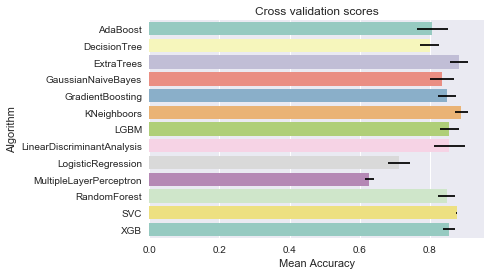

In [13]:
# Modeling step Test differents algorithms 
classifiers = [
                AdaBoostClassifier(
                    DecisionTreeClassifier(random_state = 17),
                    random_state = 17, learning_rate = 0.1
                ),
                DecisionTreeClassifier(random_state = 17),
                ExtraTreesClassifier(random_state = 17),
                GaussianNB(),
    
                GradientBoostingClassifier(random_state=17),
                KNeighborsClassifier(),
                LGBMClassifier(),
                LinearDiscriminantAnalysis(),
    
                LogisticRegression(random_state = 17),
                MLPClassifier(random_state = 17),
                RandomForestClassifier(random_state = 17),
                SVC(random_state=17),
    
                XGBClassifier()
              ]

cv_results = [cross_val_score(classifier, train_x, y=train_y, scoring="accuracy", cv=kfold) for classifier in classifiers]

cv_means = [cv_result.mean() for cv_result in cv_results]
cv_std = [cv_result.std() for cv_result in cv_results]

cv_results = pd.DataFrame({
                        "CrossValMeans":cv_means,
                        "CrossValerrors": cv_std,
                        "Algorithm":[
                            "AdaBoost",
                            "DecisionTree",
                            "ExtraTrees",
                            "GaussianNaiveBayes",
                            
                            "GradientBoosting",
                            "KNeighboors",
                            "LGBM",
                            "LinearDiscriminantAnalysis",
                            
                            "LogisticRegression",
                            "MultipleLayerPerceptron",
                            "RandomForest",
                            "SVC",
                            
                            "XGB"
                        ]})

sns.barplot("CrossValMeans","Algorithm", data=cv_results, palette="Set3", orient="h", **{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
_ = plt.title("Cross validation scores")

### Task 5:
Tune your classifier to achieve better than .3 precision and recall using our testing script. Check the tester.py script in the final project folder for details on the evaluation method, especially the test_classifier function. Because of the small size of the dataset, the script uses stratified shuffle split cross validation. For more info:  http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

In [14]:
# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
training_x, val_x, training_y, val_y = train_test_split(train_x, train_y, test_size=0.3, random_state=42)

### Scoring

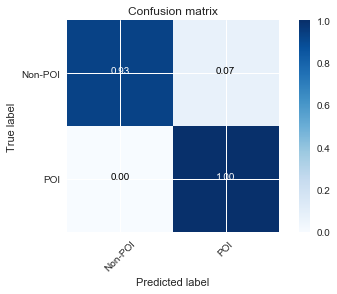

In [15]:
from sklearn.metrics import confusion_matrix

rfc_model = RandomForestClassifier()
xgb_model = XGBClassifier()

model = xgb_model

model.fit(training_x, training_y)
predictions = model.predict(val_x)

cm = confusion_matrix(val_y, predictions)

plot_confusion_matrix(cm, classes=["Non-POI", "POI"], normalize=True)

### Feature importance

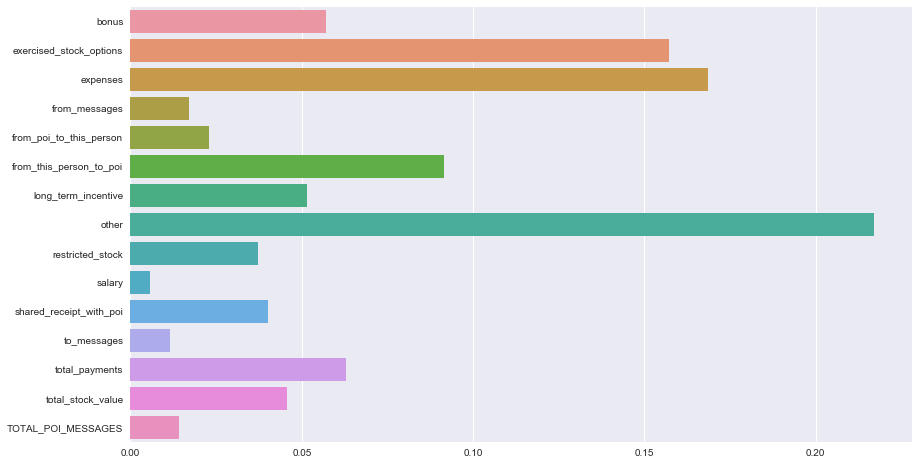

In [16]:
plt.figure(figsize=(14, 8))

importance = model.feature_importances_
feats      = train_x.columns

sns.barplot(importance, feats);

### Task 6:

Dump your classifier, dataset, and features_list so anyone can check your results. You do not need to change anything below, but make sure that the version of poi_id.py that you submit can be run on its own and generates the necessary .pkl files for validating your results.

In [ ]:
dump_classifier_and_data(model, my_dataset, train_x.columns)